In [1]:
import deepcut
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from pythainlp import word_vector
import re,string
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [2]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<*?>','', msg)
    msg = re.sub(r'\d+', '',msg)
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    msg = re.sub(r'-','',msg)
    msg = re.sub(r'ฯ','',msg)
    msg = re.sub(r'ๆ','',msg)
    msg = re.sub(r'!@#$','',msg)
    msg = re.sub(r'[a-zA-Z]','',msg)
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    
    return msg

In [4]:
input_txt = open("corpus1.txt","r")
text = input_txt.read()
txt = clean_msg(text)
input_txt.close()
corpus = txt.split()
# corpus = list(dict.fromkeys(corpus))
print(len(corpus))
print(corpus)


13891
['พยากรณ์อากาศ', 'ชั่วโมงข้างหน้า', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนแผ่ปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้ประเทศไทยตอนบนมีฝนเกิดขึ้น', 'กับมีอากาศเย็น', 'ส่วนบริเวณยอดดอยและยอดภู', 'มีอากาศหนาว', 'สำหรับมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ทำให้ภาคใต้มีฝนตกต่อเนื่อง', 'อนึ่ง', 'พายุโซนร้อน', 'อัสนี', 'พายุระดับ', 'บริเวณตะวันตกเฉียงใต้ของเกาะไต้หวัน', 'มีแนวโน้มที่จะอ่อนกำลังลง', 'และไม่มีผลกระทบต่อประเทศไทย', 'ในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังปานกลางจากประเทศจีนปกคลุมประเทศไทยตอนบน', 'ประกอบกับมีหย่อมความกดอากาศต่ำปกคลุมบริเวณประเทศกัมพูชา', 'ลักษณะเช่นนี้ทำให้บริเวณประเทศไทยตอนบนมีอากาศเย็นกับมีฝนเล็กน้อยถึงปานกลาง', 'โดยเฉพาะบริเวณภาคตะวันออกเฉียงเหนือตอนล่างและภาคตะวันออก', 'สำหรับภาคใต้ตอนล่างมีฝนตกหนักบางแห่ง', 'เนื่องจากมรสุมตะวันออกเฉียงเหนือพัดปกคลุมอ่าวไทยและภาคใต้', 'ส่วนในช่วงวันที่', 'บริเวณความกดอากาศสูงหรือมวลอากาศเย็นกำลังค่อนข้างแร

In [34]:
maxlen = 100
minlen = 10
good_sen1 = []
for i in corpus:
    if len(i) <= maxlen and len(i) >= minlen:
        good_sen1.append(i)

In [35]:
good_sen, testing = train_test_split(good_sen1, test_size = 0.1, random_state = 2)

In [36]:
# print(good_sen)
print(len(good_sen))

7994


In [37]:
thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'
thai_letters1 = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮ'
input_characters = []
target_characters = []
for i in thai_letters:
    input_characters.append(i)
    target_characters.append(i)
letters = []
for j in thai_letters1:
    letters.append(j)

In [38]:
target_characters = ['\t'] + ["\n"] +[' '] +['“'] +['”']+ target_characters
input_characters = [' '] +['“']+['”']+ input_characters

In [39]:
to_noise = []
for i in good_sen:
    to_noise.append(i)
# print(to_noise)

In [40]:
def Convert(string): 
    list1=[] 
    list1[:0]=string 
    return list1

In [41]:
noise = []
for i in to_noise:
    n = Convert(i)
    if len(i) >= 20 and len(i) <= 50:
        for k in range(4):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    elif len(i) > 50:
        for k in range(5):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    else:
        x = random.randint(1, len(i)-1)
        y = random.randint(0, len(thai_letters1)-1)
        n[x] = thai_letters1[y]
    nos = ''.join(n)
    noise.append(nos)
print(len(noise))

7994


In [42]:
noise_test = []
for i in testing:
    n = Convert(i)
    if len(i) >= 20 and len(i) <= 50:
        for k in range(4):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    elif len(i) > 50:
        for k in range(5):
            x = random.randint(1, len(i)-1)
            y = random.randint(0, len(thai_letters1)-1)
            n[x] = thai_letters1[y]
    else:
        x = random.randint(1, len(i)-1)
        y = random.randint(0, len(thai_letters1)-1)
        n[x] = thai_letters1[y]
    nos = ''.join(n)
    noise_test.append(nos)
print(len(noise_test))

889


In [43]:
input_texts = []
target_texts = []

In [44]:
for data in good_sen:
#     input_texts.append(data)
    target_texts.append('\t'+data+'\n')
for nos in noise:
    input_texts.append(nos)

In [45]:
test_inputs = []
test_targets = []
for data in testing:
#     input_texts.append(data)
    test_targets.append('\t'+data+'\n')
for nos in noise_test:
    test_inputs.append(nos)

In [46]:
print(len(test_inputs))
print(len(test_targets))

889
889


In [47]:
print(len(input_texts))
print(len(target_texts))
# print(target_texts)

7994
7994


In [48]:
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [49]:
print("Number of samples:", len(input_texts))
print("Number of samples for test:", len(testing))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 7994
Number of samples for test: 889
Number of unique input tokens: 74
Number of unique output tokens: 76
Max sequence length for inputs: 99
Max sequence length for outputs: 101


In [50]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

In [51]:
encoder_input_data_test = np.zeros(
    (len(test_inputs), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data_test = np.zeros(
    (len(test_inputs), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data_test = np.zeros(
    (len(test_inputs), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
print(len(encoder_input_data_test))

889


In [52]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
print(len(encoder_input_data))

7994


In [53]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

In [54]:
for i, (test_input, test_target) in enumerate(zip(test_inputs,test_targets)):
    for t, char in enumerate(test_input):
        encoder_input_data_test[i, t, input_token_index[char]] = 1.0
    encoder_input_data_test[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(test_target):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data_test[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data_test[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data_test[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data_test[i, t:, target_token_index[" "]] = 1.0

In [55]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
# num_samples = 10000  # Number of samples to train on.
# # Path to the data txt file on disk.
# data_path = "fra.txt"

In [56]:
print(encoder_input_data_test.shape)
print(decoder_input_data_test.shape)
print(decoder_target_data_test.shape)

(889, 99, 74)
(889, 101, 76)
(889, 101, 76)


In [57]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(7994, 99, 74)
(7994, 101, 76)
(7994, 101, 76)


In [58]:
# Define an input sequence and process it.
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [59]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [60]:
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, 74)]   0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None, 76)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 256), (None, 338944      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 256),  340992      input_4[0][0]                    
                                                                 lstm_2[0][1]          

In [61]:
history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=100,
    validation_split=0.1,
)
model.save("s2s_2")

Epoch 1/100
113/113 [==============================] - 4s 36ms/step - loss: 0.9668 - accuracy: 0.7959 - val_loss: 0.7970 - val_accuracy: 0.8207
Epoch 2/100
113/113 [==============================] - 3s 28ms/step - loss: 0.6693 - accuracy: 0.8337 - val_loss: 0.5816 - val_accuracy: 0.8651
Epoch 3/100
113/113 [==============================] - 3s 28ms/step - loss: 0.4860 - accuracy: 0.8848 - val_loss: 0.3984 - val_accuracy: 0.9046
Epoch 4/100
113/113 [==============================] - 3s 29ms/step - loss: 0.3238 - accuracy: 0.9233 - val_loss: 0.2963 - val_accuracy: 0.9275
Epoch 5/100
113/113 [==============================] - 3s 29ms/step - loss: 0.2365 - accuracy: 0.9418 - val_loss: 0.2156 - val_accuracy: 0.9467
Epoch 6/100
113/113 [==============================] - 3s 29ms/step - loss: 0.1866 - accuracy: 0.9541 - val_loss: 0.1746 - val_accuracy: 0.9578
Epoch 7/100
113/113 [==============================] - 3s 29ms/step - loss: 0.1541 - accuracy: 0.9616 - val_loss: 0.1465 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


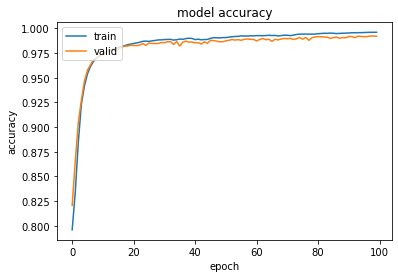

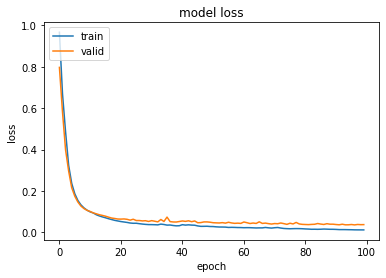

In [62]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [63]:
print(target_token_index)

{'\t': 0, '\n': 1, ' ': 2, '“': 3, '”': 4, 'ก': 5, 'ข': 6, 'ฃ': 7, 'ค': 8, 'ฅ': 9, 'ฆ': 10, 'ง': 11, 'จ': 12, 'ฉ': 13, 'ช': 14, 'ซ': 15, 'ฌ': 16, 'ญ': 17, 'ฎ': 18, 'ฏ': 19, 'ฐ': 20, 'ฑ': 21, 'ฒ': 22, 'ณ': 23, 'ด': 24, 'ต': 25, 'ถ': 26, 'ท': 27, 'ธ': 28, 'น': 29, 'บ': 30, 'ป': 31, 'ผ': 32, 'ฝ': 33, 'พ': 34, 'ฟ': 35, 'ภ': 36, 'ม': 37, 'ย': 38, 'ร': 39, 'ฤ': 41, 'ๅ': 46, 'ล': 43, 'ฦ': 45, 'ว': 47, 'ศ': 48, 'ษ': 49, 'ส': 50, 'ห': 51, 'ฬ': 52, 'อ': 53, 'ฮ': 54, 'ะ': 55, 'ั': 56, 'า': 57, 'ำ': 58, 'ิ': 59, 'ี': 60, 'ึ': 61, 'ื': 62, 'ุ': 63, 'ู': 64, 'เ': 65, 'แ': 66, 'โ': 67, 'ใ': 68, 'ไ': 69, '็': 70, '่': 71, '้': 72, '๊': 73, '๋': 74, '์': 75}


In [64]:
# x = model.predict([encoder_input_data,decoder_input_data]).argmax(axis=1)
# print(x[0])

In [65]:
# x = model.evaluate([encoder_input_data_test, decoder_input_data_test],decoder_target_data_test)

In [77]:
scores = model.evaluate([encoder_input_data_test, decoder_input_data_test],decoder_target_data_test)
print('\n')
# print(f"{model.metrics_names[1]}    |    {model.metrics_names[2]}   |  {model.metrics_names[3]}")
# print(f"{scores[3] * 100:.2f}            {scores[3] * 100:.2f}             {scores[3] * 100:.2f}")
print(f"{model.metrics_names[1]} : {scores[1] * 100:.2f}")
print('\n')

28/28 [==============================] - 0s 9ms/step - loss: 0.0456 - accuracy: 0.9906


accuracy : 99.06




In [78]:
print(scores)

[0.04559479281306267, 0.9906447529792786]


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [68]:
model = keras.models.load_model("s2s_2")

In [69]:
# Define sampling models
# Restore the model and construct the encoder and decoder.
# model = keras.models.load_model("s2s_4")

encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_5")
decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_6")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence



In [70]:
for seq_index in range(10):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data_test[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)

-
Input sentence: อุณหภจมิต่ำสุด
Decoded sentence: อุณหภูมิต่ำสุด

-
Input sentence: องผาเซลเซียส
Decoded sentence: ภาคตะวันออก

-
Input sentence: บริๅวณจังหวัดแมบฮ่องซฝน
Decoded sentence: ยังคงมีนักท่องเที่ยวขึ้นไปเที่ยวตลอด

-
Input sentence: องศดเซลเซียส
Decoded sentence: องศาเซลเซียส

-
Input sentence: เมฆเป็นส่วนมฑก
Decoded sentence: ของพื้นที่

-
Input sentence: บริเวณทีดมีฝนฟ้าคะนฌงษลื่นสูงมากกว่ฆ
Decoded sentence: พายุนี้เคลื่อนตัวทางทั้งที่อนตาวันลงเป็นเด้อย

-
Input sentence: ส่วนมากบริเวถจังหวัดเผษฮบุรี
Decoded sentence: ทะเลมีคลื่นสูงประมาณ

-
Input sentence: อุณหภูมิสูงสฏด
Decoded sentence: ฝุ่นละอองขนาดเล็ก

-
Input sentence: สญวนมากบๅิเวณจังพวัฝสุราษฎร์ธานี
Decoded sentence: องศาเซลเซียส

-
Input sentence: ลมตถษันออกเฉียงเวนืฅ
Decoded sentence: อุณหภูมิจะลดลง

